# Identification of benign or malignant tumors using Scikit Learn
<hr/>

## 1. Introduction
In this notebook, we will be using Scikit-learns Logistic Regression module to classify tumours in female breasts as being malignant or benign. A benign tumor is a non-cancerous tumor, thus it is unable to spread throughout the body. Whereas malignant tumors are cancerous cells which can multiply uncontrollably and spread throughout the body.

## 2. About the dataset
The dataset used in this project is the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) taken from the Kaggle website. For more background information about the dataset, please visit the above link. 

## 3. Working with the dataset
The following modules are required for loading and visualising the data.

In [1]:
import pandas as pd                    #Module to read and work with data
import matplotlib.pyplot as plt        #Module which deals with plotting data
import seaborn as sns                  #A more advanced module to visualise data
%matplotlib inline

Our data is stored in a CSV file, which can be loaded into the program by using the <b>read_csv()</b> function in the pandas module.

In [2]:
cancer_data = pd.read_csv("data.csv")

In [3]:
print("The number of rows in the dataset : {}".format(len(cancer_data)))
cancer_data.head()     #Shows the first 5 rows in the dataset

The number of rows in the dataset : 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can see that the dataset consists of 33 columns of data. These columns can be listed by using the following statement.

In [4]:
print(list(cancer_data.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


## 4. Using Seaborn to visualise data

[Seaborn](https://seaborn.pydata.org/index.html) is a statistical data visualising module. It is build over matplotlib, another simpler plotting tool. Seaborn can be used to implement many types of plots. In this project, we will we using swarmplot which is primarily used to visualise categorical data.

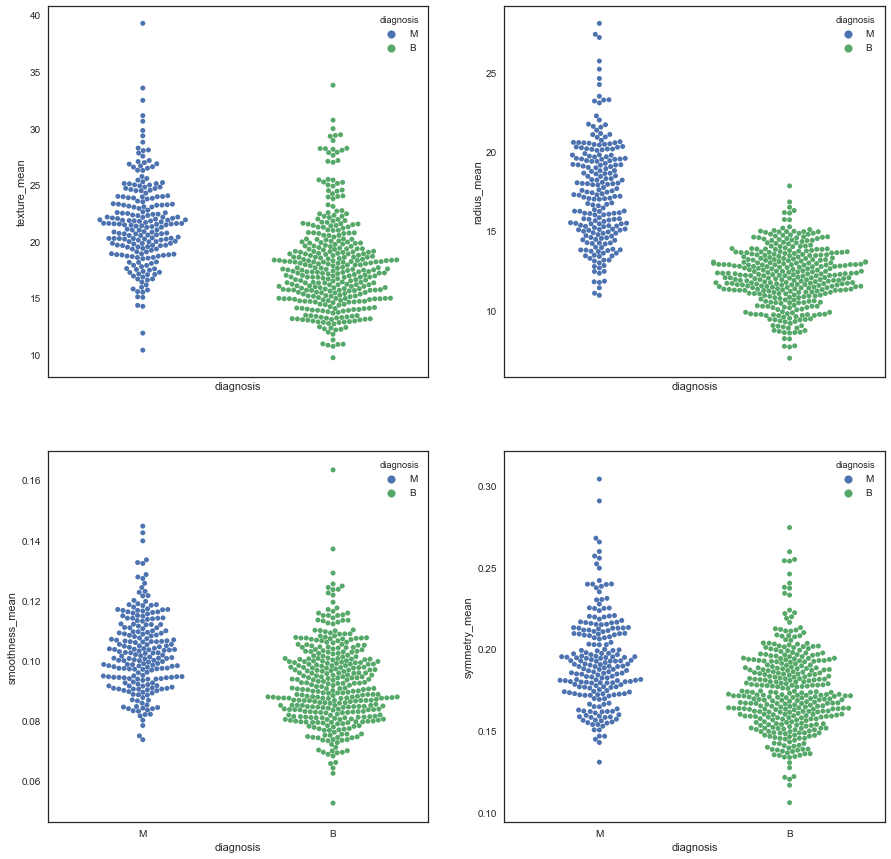

In [5]:
sns.set(style="white")
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)

sns.swarmplot(data=cancer_data, x="diagnosis", y="texture_mean", hue="diagnosis", ax=axes[0,0])
sns.swarmplot(data=cancer_data, x="diagnosis", y="radius_mean", hue="diagnosis", ax=axes[0,1])
sns.swarmplot(data=cancer_data, x="diagnosis", y="smoothness_mean", hue="diagnosis", ax=axes[1,0])
sns.swarmplot(data=cancer_data, x="diagnosis", y="symmetry_mean", hue="diagnosis", ax=axes[1,1])

## 5. Data wrangling
Data wrangling involved cleaning the dataset. This involved removing unavailable data as well as transforming the data such that it can be used for logistic regression.

To find entires which have null values, we will be using the <b>isnull()</b> function. The isnull() function returns a boolean table, showing whether the value at that idex is null or not. We can make this into a more readable format by calling the <b>sum()</b> of null values in a column.

In [6]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We can see that the last column is the only data that needs to be removed. We can remove this by calling the <b>drop()</b> function.

In [7]:
cancer_data.drop("Unnamed: 32", axis=1, inplace=True)

In [8]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Logistic regression can take in values only in numerical format. This requires us to change the "diagnosis" column into numbers. This can be done by calling the <b>get_dummies()</b> function, which converts the column into indicator variables.

We can even drop one of the values, because it can be determined by the other values.

In [9]:
c_type = pd.get_dummies(cancer_data['diagnosis'], drop_first=True)
c_type.head()

,M
0,1
1,1
2,1
3,1
4,1


We can now remove the "diagnosis" column and append the new column to the dataset. These two datasets can be combined by using the <b>concat()</b> function.

We can also remove any other redundant columns. Here, the only redundant column is the "id" column.

In [10]:
cancer_data = pd.concat([cancer_data, c_type], axis=1)
cancer_data.drop(['id', 'diagnosis'], axis=1, inplace = True)
cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 6. Logistic regression using Scikit-learn

Scikit-learn is the most commonly used library for machine learning. It has got multiple tools for preprocessing, modelling and accuracy testing.

To perform logistic regression, the dataset first needs to be divided into testing and training sets. The following modules are imported to perform the same.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
X = cancer_data.drop("M", axis=1)     #Consists of all the features required for regression
y = cancer_data["M"]                  #Consists the actual output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     #A 80:20 ratio is generally taken for training and testing sets
print("{} rows in the dataset is split into {} training and {} testing rows.".format(len(cancer_data),len(X_train),len(X_test)))

569 rows in the dataset is split into 455 training and 114 testing rows.


In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/sonaal/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Our model is now fit by using the training set. To perform predictions with this model, the <b>predict()</b> function is called, and the testing set is sent as the argument.

In [14]:
prediction = logmodel.predict(X_test)

## 7. Accuracy
Scikit-learn comes with its own methods to calculate accuracy. It can be calculated in many methods. 

1. Precision, recall and f1-score:
 - Precision is the ratio of the total number of correct positives to the total number of positive predictions.
 - Recall is the ratio of the total number of correct positives to the total number of correct predictions.
 - f1-score is the harmonic mean of the precision and recall.
2. Confusion matrix: A 2D representation of the predicted class vs. the actual class
3. Percentage of accuracy

These tools are also provided in the scikit-learn library.

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
print(confusion_matrix(y_test, prediction))

[[68  3]
 [ 2 41]]


In [21]:
print("Accuracy : {0:.3f}%".format(accuracy_score(y_test, prediction) * 100))

Accuracy : 95.614%
